In [15]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
os.chdir('C:\\Users\\SEO09\\python\\practice\\crypto_trading')
with open('data_csv/data_ADA_KRW.csv') as f:
    a = pd.read_csv(f).drop(['Unnamed: 0'], axis = 1)

b = a.drop(['timestamp','time','volumefrom'], axis = 1)
os.chdir('C:\\Users\\SEO09\\python\\practice\\machine_learning')    

In [24]:
hours = 12

In [76]:
mav = np.array([b.close[i] for i in range(hours)] + [np.mean(b.close[i-hours:i]) for i in range(hours,len(b))])

In [143]:
c = b.head()
print(c)

      close      high       low      open  volumeto       mav     bolup  \
0  0.000588  0.000596  0.000581  0.000596    487.59  0.000588  0.000588   
1  0.000578  0.000595  0.000570  0.000588    652.12  0.000578  0.000578   
2  0.000585  0.000603  0.000575  0.000578    759.51  0.000585  0.000585   
3  0.000599  0.000600  0.000570  0.000585    428.13  0.000599  0.000599   
4  0.000614  0.000615  0.000596  0.000599    477.77  0.000614  0.000614   

    boldown    voldel  percent  bolupdel  boldowndel  
0  0.000588  0.000000      0.0       0.0         0.0  
1  0.000578  0.337435      0.0       0.0         0.0  
2  0.000585  0.164678      0.0       0.0         0.0  
3  0.000599 -0.436308      0.0       0.0         0.0  
4  0.000614  0.115946      0.0       0.0         0.0  


In [89]:
b['mav'] = mav

In [93]:
mstd = np.array([0]*hours + [np.std(b.close[i-hours:i]) for i in range(hours,len(b))])

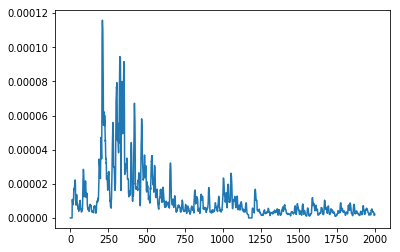

In [94]:
plt.plot(mstd)

In [95]:
b['bolup'] = mav + mstd*2
b['boldown'] = mav - mstd*2

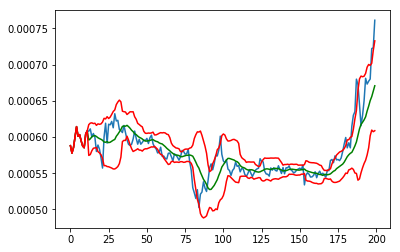

In [141]:
plt.plot(b.close[:200])
plt.plot(mav[:200], color = 'g')
plt.plot(b.bolup[:200], color = 'r')
plt.plot(b.boldown[:200], color = 'r')

In [115]:
voldel = np.array([0] + [(b.volumeto[i]-b.volumeto[i-1])/b.volumeto[i-1] for i in range(1,len(b))])

C:\Users\SEO09\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\SEO09\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


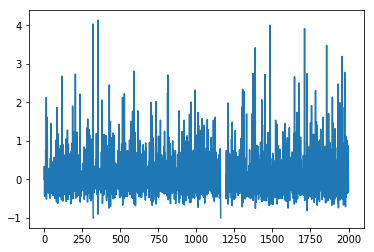

In [136]:
b['voldel'] = voldel
plt.plot(voldel)

In [150]:
percent = np.array([(b.close[i]-b.close[i-hours])/b.close[i-hours] for i in range(hours,len(b))] + [0]*hours )*100

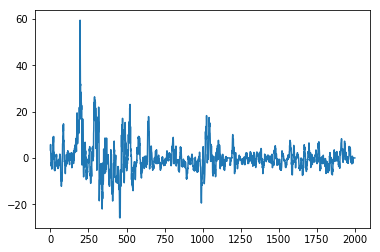

In [151]:
plt.plot(percent)

In [134]:
b['percent'] = percent

In [142]:
b['bolupdel'] = (b.bolup - b.close)/b.close
b['boldowndel'] = (b.boldown - b.close)/b.close

In [146]:
seq_length = 24 # batch
data_dim = 4
output_dim = 1 # 예상 가격을 출력
hidden_dim = 20

In [154]:
x = np.array(b[['close', 'bolupdel', 'boldowndel', 'voldel']])
y = np.array(b[['percent']])

In [155]:
dataX = []
dataY = []
for i in range(len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    dataX.append(_x) # data with previous data
    dataY.append(_y) # label

In [156]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataX)])

In [157]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None,1])

In [158]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, state_is_tuple = True)
output, state = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(output[:,-1], output_dim, activation_fn = None)

In [159]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))

opt = tf.train.AdamOptimizer(0.01)
train = opt.minimize(loss)

In [160]:
print('start learning')
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('initialized')

start learning
initialized


In [161]:
for i in range(2000):
    tr, l = sess.run([train, loss], feed_dict = {X: trainX, Y: trainY})
    if i%100 == 0:
        print('cycle {} of 2000 done \r'.format(i))

cycle 0 of 2000 done 
cycle 100 of 2000 done 
cycle 200 of 2000 done 
cycle 300 of 2000 done 
cycle 400 of 2000 done 
cycle 500 of 2000 done 
cycle 600 of 2000 done 
cycle 700 of 2000 done 
cycle 800 of 2000 done 
cycle 900 of 2000 done 
cycle 1000 of 2000 done 
cycle 1100 of 2000 done 
cycle 1200 of 2000 done 
cycle 1300 of 2000 done 
cycle 1400 of 2000 done 
cycle 1500 of 2000 done 
cycle 1600 of 2000 done 
cycle 1700 of 2000 done 
cycle 1800 of 2000 done 
cycle 1900 of 2000 done 


In [162]:
testPred = sess.run(Y_pred, feed_dict = {X: testX})

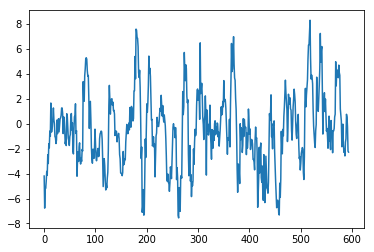

In [163]:
plt.plot(testY)
plt.plot(testPred)
plt.show()

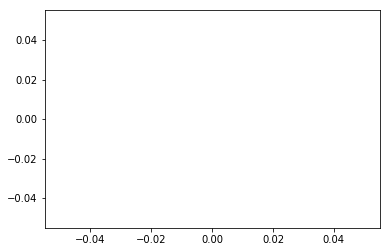

In [164]:
plt.plot(testPred)

In [166]:
testPred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      